In [1]:
%cd /workspace
%load_ext autoreload
%autoreload 2

/workspace


In [2]:
from src.datasets import EvalFFHQ


dataset = EvalFFHQ(
    'data/wspace_ffhq_feat.npy',
    'data/sspace_ffhq_feat.npy',
    'data/cspace_ffhq_feat.npy',
    limit=30
)

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from torch.utils.data import DataLoader

loader = DataLoader(dataset, batch_size=16)

In [4]:
batch = next(loader.__iter__())

In [5]:
from src.models.ffclip import FFCLIPInferencer

inferencer = FFCLIPInferencer(
    stylegan2_ckpt='saved/stylegan2/stylegan2-ffhq-config-f.pt',
    clip_ckpt='ViT-B/32',
    ffclip_ckpt='saved/models/ffclip.ckpt',
    device='cuda:0',
    stylegan_size=1024,
    style_dim=512
)

100%|███████████████████████████████████████| 338M/338M [01:07<00:00, 5.28MiB/s]


In [6]:
gen, src = inferencer(**batch, text_prompt='angry')

In [7]:
gen.shape, src.shape

(torch.Size([16, 3, 1024, 1024]), torch.Size([16, 3, 1024, 1024]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


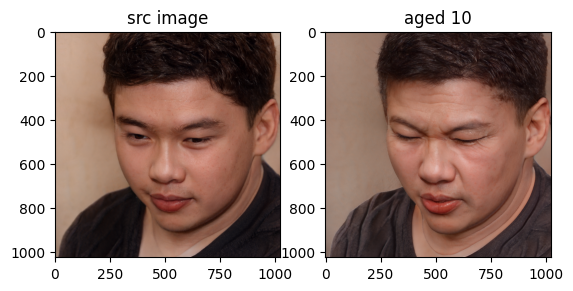

In [8]:
import matplotlib.pyplot as plt

ind = 2

_, axs = plt.subplots(ncols=2)

axs[0].imshow(src[ind].permute(1, 2, 0) * 0.5 + 0.5)
axs[0].set_title('src image')

axs[1].imshow(gen[ind].permute(1, 2, 0) * 0.5 + 0.5)
axs[1].set_title('aged 10');

In [9]:
!nvidia-smi

Tue May  7 16:32:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.08             Driver Version: 535.161.08   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090        Off | 00000000:09:00.0 Off |                  N/A |
| 31%   57C    P2             153W / 350W |  22021MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--